In [1]:
# Import libs
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# read data in pandas dataframe
raw=pd.read_csv('movie_metadata.csv')

In [3]:
# Basic picture of the data
print(raw.info())
print('------------------------------------------')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

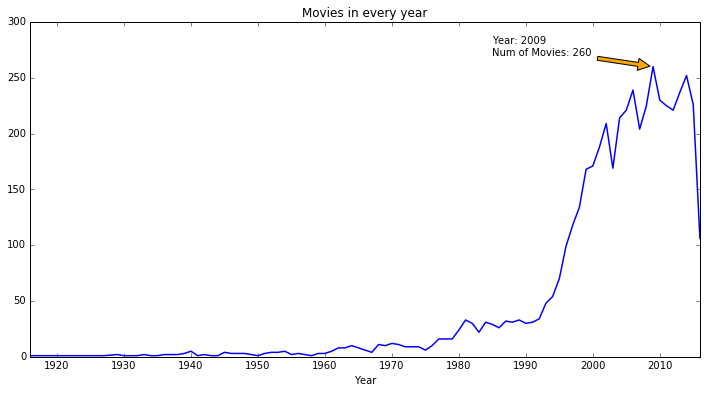

In [4]:
# First to see how many movies reviewd every year
# Notice that most movies without title_year are TV shows
# Drop those movies to gen a new dataframe called movie_raw
raw[raw['title_year'].isnull()].movie_title
movie_raw = raw[raw['title_year'].notnull()]
movie_ave_y=movie_raw.groupby('title_year')['movie_title'].count()
m=movie_ave_y.max()
my=int(movie_ave_y.idxmax())
fig=plt.figure(figsize=(12,6), dpi=250)
plt.xticks(np.linspace(1910,2020,12,endpoint=True))
ax = fig.add_subplot(111)
ax = movie_ave_y.plot(title='Movies in every year', linewidth=1.5)
ax.set_xlabel('Year')
ax.annotate('Year: %d \nNum of Movies: %d' % (my, m), xy=(my, m), xytext=(1985, 270), arrowprops=dict(facecolor='orange', shrink=0.05))

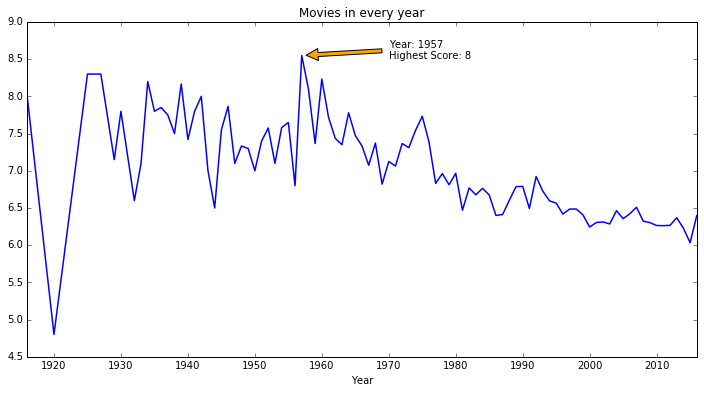

In [11]:
# How is the average score every year
ave_score = movie_raw.groupby('title_year')['imdb_score'].mean()
m_score=ave_score.max()
score_y=int(ave_score.idxmax())
fig2=plt.figure(figsize=(12, 6), dpi=250)
plt.xticks(np.linspace(1910,2020,12,endpoint=True))
ax2 = fig.add_subplot(111)
ax2 = ave_score.plot(title='Ave Score every Year', linewidth=1.5)
ax2.set_xlabel('Year')
ax2.annotate('Year: %d \nHighest Score: %d' % (score_y, m_score), xy=(score_y, m_score), xytext=(1970, 8.5), arrowprops=dict(facecolor='orange', shrink=0.05))

count    4.935000e+03
mean     8.486459e+04
std      1.396016e+05
min      5.000000e+00
25%      8.946000e+03
50%      3.498500e+04
75%      9.788800e+04
max      1.689764e+06
Name: num_voted_users, dtype: float64
------------------------------------------


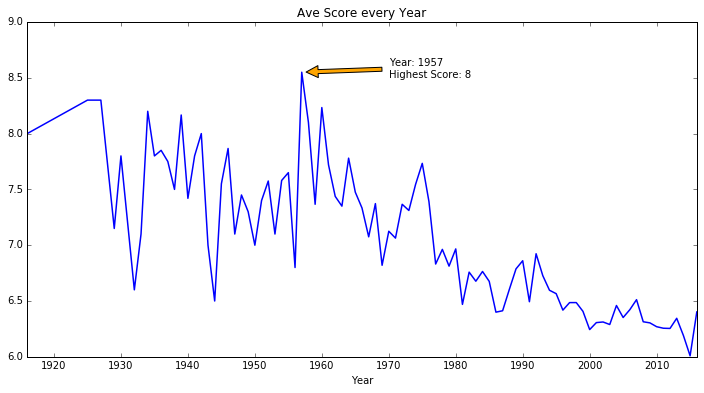

In [32]:
# What if we reduce the movies which have few voters
# Waht will the average scores over years look like
# drop those num of voters less than 200 and score more than 8.8 or less than 1.2
print(movie_raw.num_voted_users.describe())
print('------------------------------------------')
droped_movie_raw=movie_raw[movie_raw.num_voted_users>=100]
droped_ave_score = droped_movie_raw.groupby('title_year')['imdb_score'].mean()
dm_score=droped_ave_score.max()
score_dy=int(droped_ave_score.idxmax())
fig3=plt.figure(figsize=(12, 6), dpi=250)
plt.xticks(np.linspace(1910,2020,12,endpoint=True))
ax3 = fig.add_subplot(111)
ax3 = droped_ave_score.plot(title='Ave Score every Year', linewidth=1.5)
ax3.set_xlabel('Year')
ax3.annotate('Year: %d \nHighest Score: %d' % (score_dy, dm_score), xy=(score_dy, dm_score), xytext=(1970, 8.5), arrowprops=dict(facecolor='orange', shrink=0.05))

In [37]:
genres = raw.groupby(raw['genres'])['genres'].count()

In [41]:
genres.index

Index(['Action', 'Action|Adventure',
       'Action|Adventure|Animation|Comedy|Crime|Family|Fantasy',
       'Action|Adventure|Animation|Comedy|Drama|Family|Fantasy|Thriller',
       'Action|Adventure|Animation|Comedy|Drama|Family|Sci-Fi',
       'Action|Adventure|Animation|Comedy|Family',
       'Action|Adventure|Animation|Comedy|Family|Fantasy',
       'Action|Adventure|Animation|Comedy|Family|Fantasy|Sci-Fi',
       'Action|Adventure|Animation|Comedy|Family|Sci-Fi',
       'Action|Adventure|Animation|Comedy|Fantasy',
       ...
       'Mystery|Western', 'Romance', 'Romance|Sci-Fi|Thriller',
       'Romance|Short', 'Sci-Fi', 'Sci-Fi|Thriller', 'Thriller',
       'Thriller|War', 'Thriller|Western', 'Western'],
      dtype='object', name='genres', length=914)